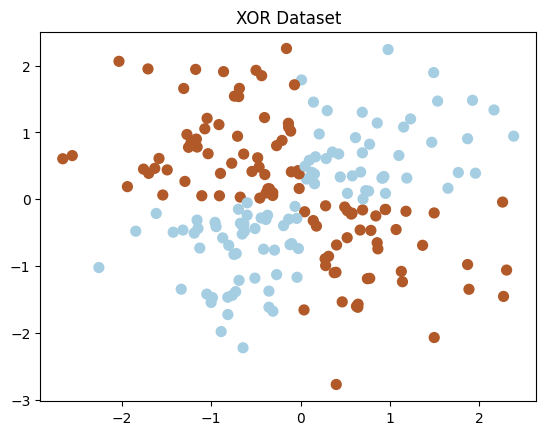

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate XOR dataset
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = 2 * y - 1  # Convert labels to -1 and 1

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=50)
plt.title('XOR Dataset')
plt.show()


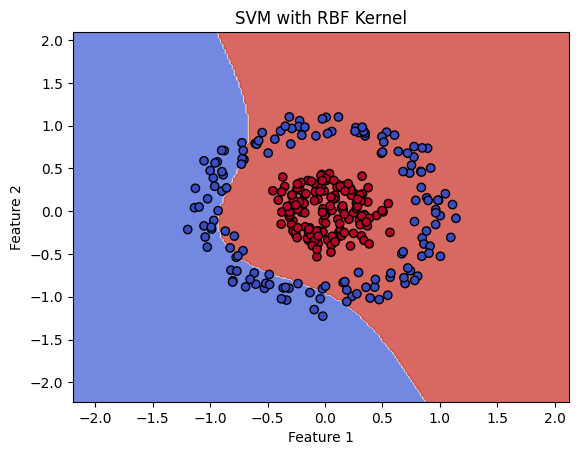

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate synthetic data
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Create and fit an SVM model with RBF kernel
#model = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
model = make_pipeline(StandardScaler(), SVC(kernel='poly', gamma='auto'))
model.fit(X, y)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel')
plt.show()


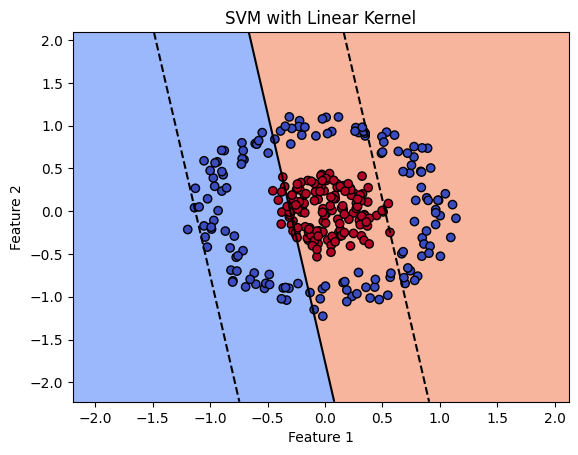

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate synthetic data
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Create and fit an SVM model with RBF kernel
#model = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', C=1))
model = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma='auto'))

model.fit(X, y)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], cmap=plt.cm.coolwarm, alpha=0.8)
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
#plt.scatter(model.named_steps['svc'].support_vectors_[:, 0], model.named_steps['svc'].support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Linear Kernel')
plt.show()


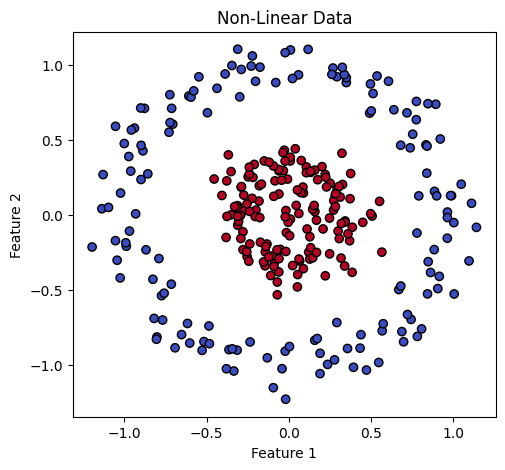

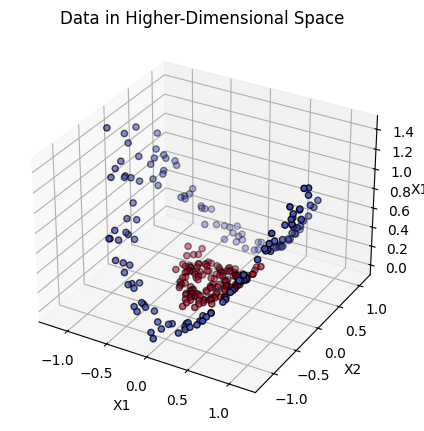

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Transform data using polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Plot original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.title('Non-Linear Data')

# Plot data in higher-dimensional space
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_poly[:, 1], X_poly[:, 2], X_poly[:, 3], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1^2')
ax.set_title('Data in Higher-Dimensional Space')
plt.show()


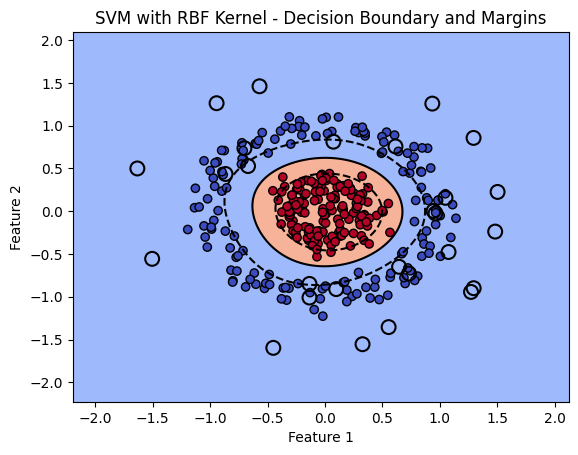

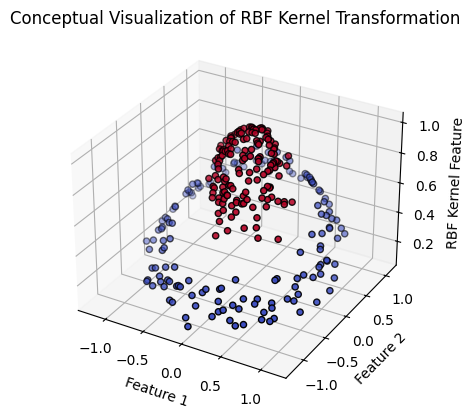

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Create and fit an SVM model with RBF kernel
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', C=1))
model.fit(X, y)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], cmap=plt.cm.coolwarm, alpha=0.8)
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.scatter(model.named_steps['svc'].support_vectors_[:, 0], model.named_steps['svc'].support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel - Decision Boundary and Margins')
plt.show()

# Conceptual visualization of RBF transformation (3D projection)
# Note: This is a conceptual visualization. Actual RBF kernel maps to infinite-dimensional space.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z_rbf = np.exp(-1 * ((X[:, 0][:, np.newaxis] - X[:, 0])**2 + (X[:, 1][:, np.newaxis] - X[:, 1])**2))
ax.scatter(X[:, 0], X[:, 1], Z_rbf[:, 0], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('RBF Kernel Feature')
plt.title('Conceptual Visualization of RBF Kernel Transformation')
plt.show()


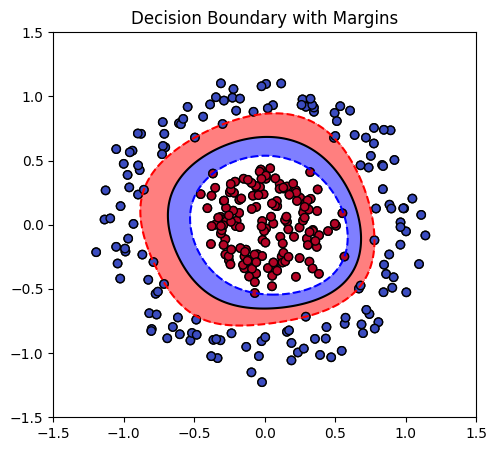

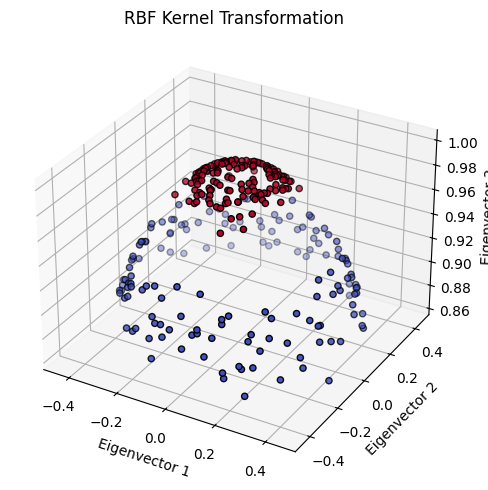

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)
y = 2 * y - 1  # Convert labels to -1 and 1

# Fit the model using RBF kernel
svc = SVC(kernel='rbf', C=1e6)
svc.fit(X, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
zz = np.c_[xx.ravel(), yy.ravel()]
decision_function = svc.decision_function(zz).reshape(xx.shape)

# Plot the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Original Data')

# Plot the decision boundary and margin
plt.contourf(xx, yy, decision_function, levels=[-1, 0, 1], colors=['red', 'blue', '#AAFFAA'], alpha=0.5)
plt.contour(xx, yy, decision_function, levels=[-1, 0, 1], colors=['red', 'black', 'blue'], linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Decision Boundary with Margins')

# Manual RBF kernel transformation for visualization
def rbf_kernel(X1, X2, gamma=0.1):
    pairwise_sq_dists = np.sum((X1[:, np.newaxis] - X2[np.newaxis, :]) ** 2, axis=2)
    return np.exp(-gamma * pairwise_sq_dists)

# Create transformed data for 3D plot
gamma = 0.1
K = rbf_kernel(X, X, gamma=gamma)
eigvals, eigvecs = np.linalg.eigh(K)

# Use the largest 3 eigenvectors to plot the transformed data
X_transformed = eigvecs[:, -3:] * np.sqrt(eigvals[-3:])

# 3D plot for RBF kernel transformation
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
ax.set_zlabel('Eigenvector 3')
plt.title('RBF Kernel Transformation')
plt.tight_layout()
plt.show()
